In [31]:
# Imports
import numpy as np
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from sklearn import preprocessing as pp
from sklearn import linear_model as lm


In [32]:
# Dataset
np.random.seed(0)
m = 100
X = np.linspace(-5, 5, num=m) # Variável exploratória
y = 0.3*X**2 + X + 2 + np.random.normal(size=m)

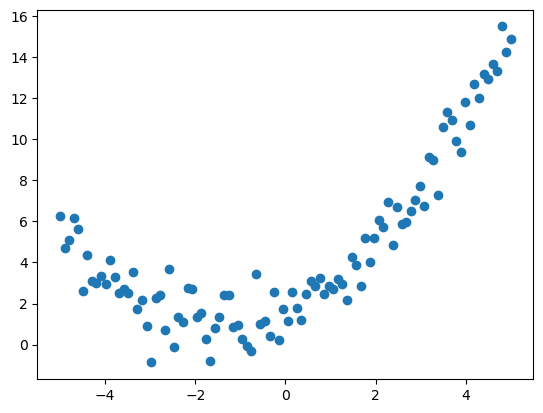

In [33]:
plt.scatter( X, y )

In [34]:
# Model Training
# Incluir termos polinomiais de grau 2
poly = pp.PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform( X.reshape(-1, 1) )

# model training
model = lm.LinearRegression()
model.fit( X_poly, y )

LinearRegression()

In [35]:
# predict
yhat = model.predict( X_poly )

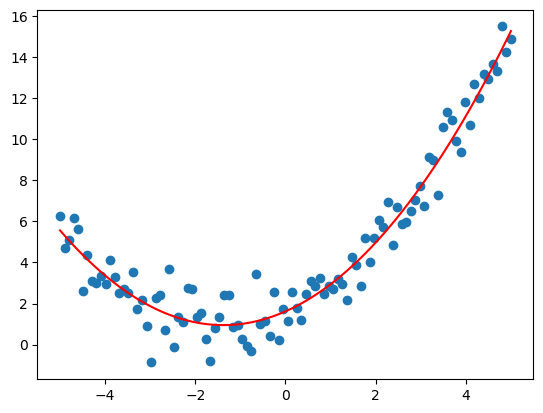

In [36]:
# plot
plt.scatter( X, y )
plt.plot( X, yhat, color='red' )

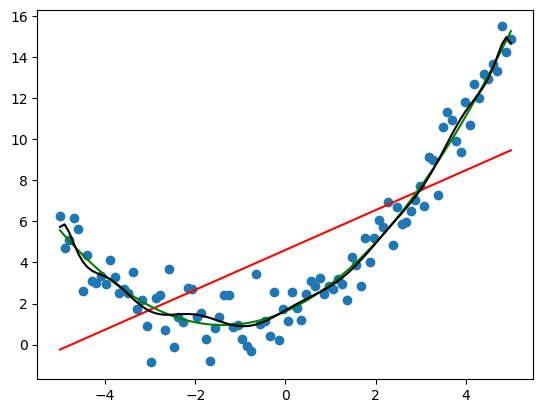

In [37]:
# Graus do polinômio
degrees = [1, 2, 15]
coefs = []
intercepts = []
preds = []
for i in degrees:
    # features
    poly_features = pp.PolynomialFeatures( degree=i, include_bias=False )
    X_poly = poly_features.fit_transform( X.reshape( -1, 1 ) )
    # model training
    model = lm.LinearRegression()
    model.fit( X_poly, y )
    # model predict
    yhat = model.predict( X_poly )
    preds.append( yhat )
# Visualização dos gráficos
plt.scatter( X, y )
plt.plot( X, preds[0], color='red' )
plt.plot( X, preds[1], color='green' )
plt.plot( X, preds[2], color='black' )

In [38]:
# Gerando os dados do polinômio
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 2) * 10 # Duas variáveis exploratórias entre 0 e 10
coef = np.array([4, -3, 2]) # Coeficientes do polinômio verdadeiro: 2*X₁² - 3*X₂ + 4

y_true = np.dot(np.column_stack([X[:, 0]**2, X[:, 1], np.ones(n_samples)]), coef)
y_noise = np.random.normal(0, 2, n_samples) # Adicionando ruído aos dados
y = y_true + y_noise

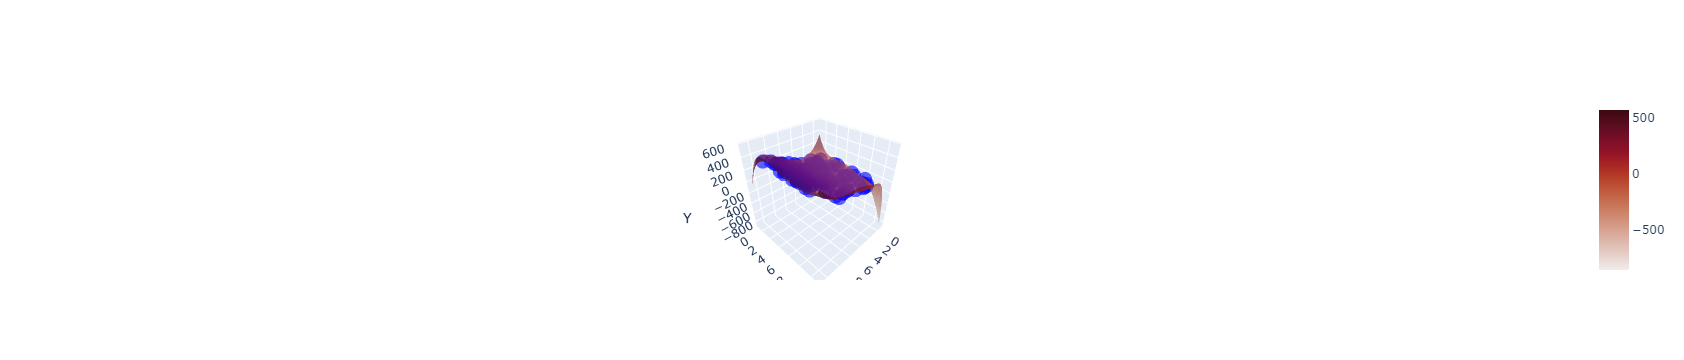

In [39]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=8, include_bias=True)
X_poly = poly.fit_transform(X)
# Treinando o modelo de regressão polinomial
model = lm.LinearRegression()
model.fit(X_poly, y)
# Gerando pontos na malha para plotar a superfície de decisão
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
np.arange(x2_min, x2_max, 0.1))
X_mesh = np.column_stack([x1_mesh.ravel(), x2_mesh.ravel()])
X_mesh_poly = poly.transform(X_mesh)
y_mesh = model.predict(X_mesh_poly)
y_mesh = y_mesh.reshape(x1_mesh.shape)
# Criando o gráfico 3D
fig = go.Figure(data=[
go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(color='blue', opacity=0.6), name='Dados'),
go.Surface(x=x1_mesh, y=x2_mesh, z=y_mesh, colorscale='amp', opacity=0.6, name='Superfície de Decisão')
])
# Configurando o layout do gráfico
fig.update_layout(scene=dict(
xaxis_title='X1',
yaxis_title='X2',
zaxis_title='Y',
aspectmode='auto'
))
# Exibindo o
